# Diabetes Prediction Using Machine Learning

## Introduction
Diabetes is a chronic condition that affects millions of people worldwide. Early detection and management are crucial for improving patient outcomes and reducing healthcare costs. This project aims to predict the onset of diabetes using various machine learning algorithms. By comparing the performance of different models, we can identify the most effective method for this task.

## Dataset
The dataset used for this project contains medical details of patients, including features such as glucose level, blood pressure, insulin level, BMI, age, and more. The target variable indicates whether a patient has diabetes.

## Objectives
1. Explore and understand the dataset.
2. Clean and preprocess the data.
3. Implement multiple classification algorithms.
4. Compare the performance of these models.
5. Draw conclusions and suggest improvements.


## Dataset Exploration and Understanding
### Import The Required Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Loading and Displaying the Dataset
We start by loading the dataset and displaying the first few rows to understand its structure.

In [2]:
#Load and Display the Dataset
df = pd.read_csv('/kaggle/input/diabetes-dataset-using-many-medical-metrics/diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dataset Information
Next, we examine the dataset's structure, including the data types and any missing values.

In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Statistical Summary
We generate a statistical summary to understand the distribution and central tendencies of the numerical features.



In [4]:
# Statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualizing the Target Variable
We visualize the distribution of the target variable to understand the class balance.

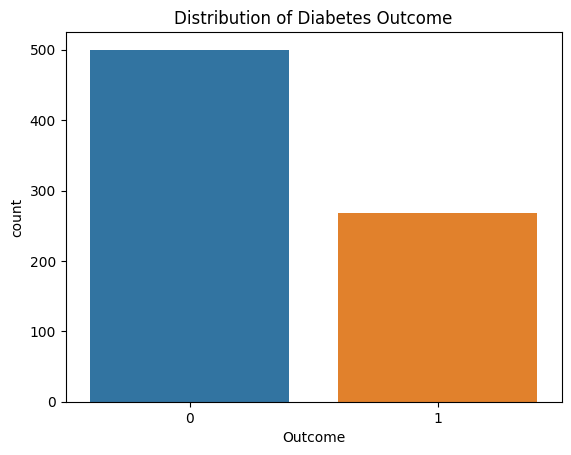

In [5]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

### Correlation Matrix
To identify relationships between features, we plot a correlation matrix.

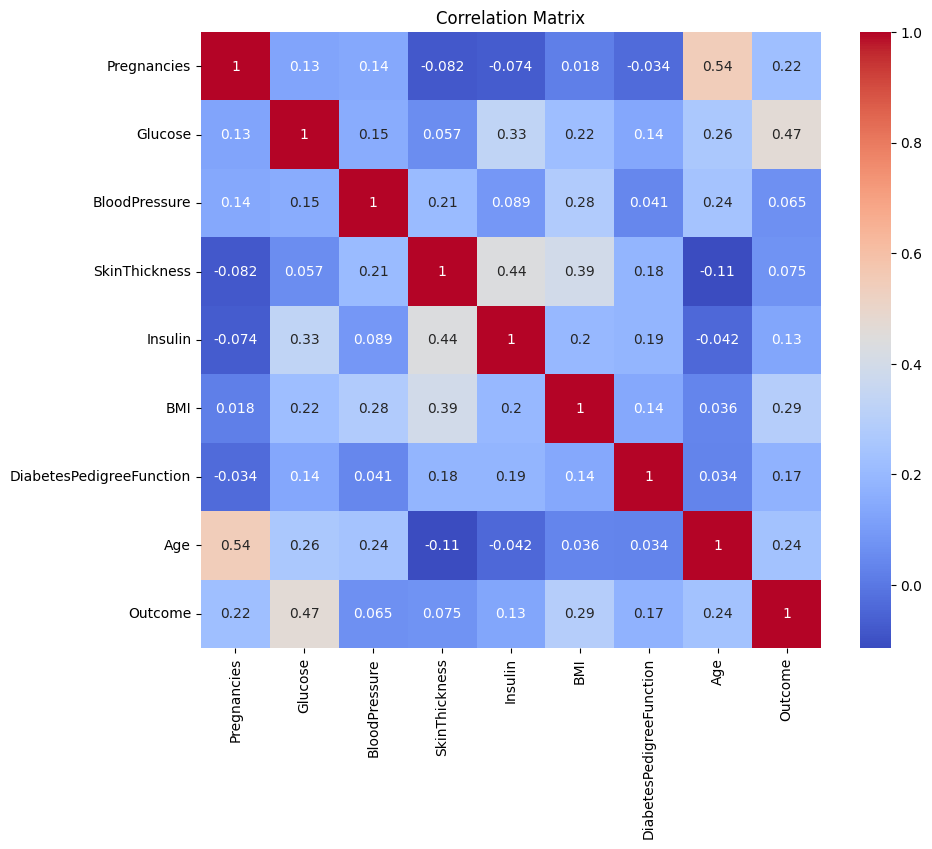

In [14]:
# Visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning and Preprocessing
### Feature and Target Separation
We separate the features (X) from the target variable (y).

In [ ]:
# Feature and target separation
x = df.drop('Outcome', axis=1)
y = df['Outcome']

### Scaling the Features
To ensure that all features contribute equally to the model, we scale the data.

In [ ]:
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Splitting the Data
We split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## Model Building

We implement and evaluate various classification algorithms: Decision Tree, Logistic Regression, Support Vector Machine, Naive Bayes, and Random Forest.

### Decision Tree Classifier
A Decision Tree is a tree-like model used to make decisions based on input features. It splits the data into subsets based on the value of input features, creating branches until it reaches a decision (leaf nodes). Each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents the final classification or decision.

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [ ]:
# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

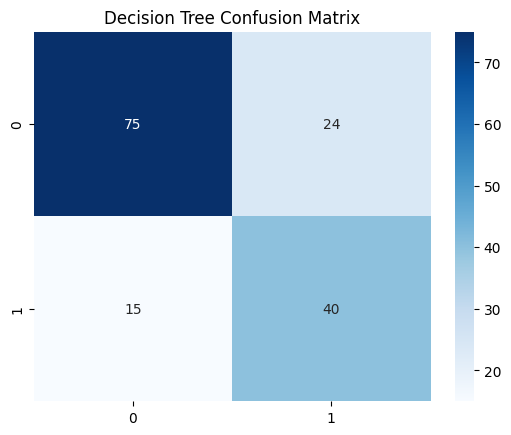

In [12]:
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [13]:
plt.figure(figsize=(15, 10))
plot_tree(dtmodel, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 1500x1000 with 0 Axes>

### Logistic Regression
Logistic Regression is a statistical model that predicts the probability of a binary outcome based on one or more predictor variables. It uses a logistic function to model the relationship between the dependent variable and independent variables.

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [ ]:
# Logistic regression Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [ ]:
print(f'Logistic Regression:\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Support Vector Machine
SVM is a supervised learning algorithm that finds the hyperplane that best separates the classes in the feature space. It works by maximizing the margin between the closest points of the classes (support vectors).

In [ ]:
# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [ ]:
# SVM Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [ ]:
print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

### Naive Bayes
Naive Bayes is a probabilistic classifier based on Bayes' Theorem, assuming independence between predictors. Despite the "naive" assumption of feature independence, it often performs well in practice, especially for text classification problems.

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

In [ ]:
# Naive Bayes Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [ ]:
print(f'Naive Bayes:\n Accuracy: {accuracy_nb}\n Precision: {precision_nb}\n Recall: {recall_nb}\n F1 Score: {f1_nb}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Random Forest
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It reduces overfitting by averaging the results.

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)


In [ ]:
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [ ]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Conclusion

In this project, we explored and analyzed a diabetes dataset to predict the onset of diabetes using various machine learning algorithms. We implemented and evaluated five different models: Decision Tree, Logistic Regression, Support Vector Machine, Naive Bayes, and Random Forest.

### Model Comparison
- **Decision Tree**: 
  - Accuracy: 0.7468
  - Precision: 0.6250
  - Recall: 0.7273
  - F1 Score: 0.6723
  - **Why not the best?** The Decision Tree has a lower accuracy and F1 score compared to Naive Bayes, indicating it is less effective in balancing precision and recall.  
- **Logistic Regression**: 
  - Accuracy: 0.7532
  - Precision: 0.6491
  - Recall: 0.6727
  - F1 Score: 0.6607
  - **Why not the best?** Logistic Regression also has lower accuracy and F1 score compared to Naive Bayes, indicating it is not as effective. 
- **Support Vector Machine**: 
  - Accuracy: 0.7273
  - Precision: 0.6327
  - Recall: 0.5636
  - F1 Score: 0.5962
  - **Why not the best?** The Support Vector Machine has the lowest recall and F1 score among all models, which makes it the least effective in predicting diabetes.
- **Naive Bayes**: 
  - Accuracy: 0.7662
  - Precision: 0.6610
  - Recall: 0.7091
  - F1 Score: 0.6842  
- **Random Forest**: 
  - Accuracy: 0.7273
  - Precision: 0.6182
  - Recall: 0.6182
  - F1 Score: 0.6182
  - **Why not the best?** The Random Forest has the lowest precision and recall, and therefore the lowest F1 score among the models.

### Best Performing Model
The Naive Bayes classifier has the highest accuracy (0.7662) and the highest recall (0.7091), which indicates it is better at identifying true positive cases of diabetes. Additionally, it has the highest F1 score (0.6842), which balances precision and recall, making it the most reliable model in this context.

When choosing a model, it is essential to consider the specific needs of the application. For diabetes prediction, a higher recall is crucial as it is important to identify as many positive cases as possible. The Naive Bayes classifier excels in this aspect, making it the best choice among the tested models.

### Future Work
- Experiment with hyperparameter tuning to further enhance model performance.
- Explore advanced techniques such as ensemble learning or deep learning for potentially better results.